In [1]:
# Loading libraries

import pandas as pd
import re

In [2]:
# Reading the log file

with open('sysmexdata24.log') as file:
    lines = file.readlines()

In [3]:
# Getting IDs

ids = []

for line in lines:
    found = re.findall("[0-9A-z]+\^M\|", line)
    if len(found) > 0:
        ids.append(found[0].replace("^M|", ''))

In [4]:
columns = [
    'WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH',
    'MCHC', 'PLT', 'RDW', 'RDW-CV', 'PDW', 'MPV',
    'P-LCR', 'PCT', 'NEUT#', 'LYMPH#', 'MONO#', 'EO#',
    'BASO#', 'NEUT%', 'LYMPH%', 'MONO%', 'EO%'
]

In [5]:
# Extracting rows having values

values = []

for line in lines:
    found = re.findall("\|\^\^\^\^[A-z%#]+\^1\|[0-9.-]+\|", line)
    if len(found) > 0:
        values.append(found[0].replace("|^^^^", "").replace('|', '').replace("^1", " "))

In [6]:
# Making values dictionaries

vals = []
for v in values:
    vals.append({v.split(" ")[0]: v.split(" ")[1]})

In [7]:
# Making rows list to make it a dataframe

rows = {}

rows['study_id'] = ids
rows['Date'] = ['23/09/2022' for i in range(len(ids))]

for c in columns:
    value_list = [i[c] for i in vals if c in i.keys()]
    if len(value_list) > 0:
        rows[c] = value_list

In [8]:
# Creating dataframe

df = pd.DataFrame(rows)

df

,study_id,Date,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,...,PCT,NEUT#,LYMPH#,MONO#,EO#,BASO#,NEUT%,LYMPH%,MONO%,EO%
0,31DTS02,23/09/2022,1.69,5.52,15.6,48.8,88.4,28.3,32.0,117,...,0.16,0.12,1.18,0.25,0.10,0.04,7.1,69.8,14.8,5.9
1,30DTS02,23/09/2022,2.85,5.95,14.2,44.5,74.8,23.9,31.9,189,...,0.21,0.14,1.92,0.55,0.14,0.10,4.9,67.4,19.3,4.9
2,29DTS02,23/09/2022,1.96,5.81,15.9,48.7,83.8,27.4,32.6,204,...,0.24,0.13,1.35,0.30,0.13,0.05,6.6,68.9,15.3,6.6
3,28DTS02,23/09/2022,1.95,3.64,5.6,20.5,56.3,15.4,27.3,364,...,----,0.27,1.01,0.30,0.31,0.06,13.8,51.8,15.4,15.9
4,27DTS02,23/09/2022,3.38,5.39,12.8,40.2,74.6,23.7,31.8,256,...,0.30,0.37,2.19,0.42,0.33,0.07,10.9,64.8,12.4,9.8
5,24DTS02,23/09/2022,5.69,6.38,17.0,51.0,79.9,26.6,33.3,154,...,0.21,1.91,2.67,0.70,0.24,0.17,33.6,46.9,12.3,4.2
6,20DTS02,23/09/2022,1.76,5.19,16.0,48.2,92.9,30.8,33.2,136,...,0.17,0.16,1.12,0.34,0.08,0.06,9.2,63.6,19.3,4.5
7,18DTS02,23/09/2022,1.84,4.74,13.0,39.3,82.9,27.4,33.1,90,...,0.15,0.81,0.78,0.17,0.03,0.05,44.1,42.4,9.2,1.6
8,17DTS02,23/09/2022,2.80,5.19,12.7,40.0,77.1,24.5,31.8,148,...,0.20,0.34,1.97,0.34,0.10,0.05,12.1,70.4,12.1,3.6


In [9]:
df.to_csv("sysmexdata24.csv")

In [10]:
# cleaning datatypes of columns

for c in columns:
    try:
        df[c] = df[c].astype(float)
    except:
        pass

In [11]:
df.describe()

,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,NEUT#,LYMPH#,MONO#,EO#,BASO#,NEUT%,LYMPH%,MONO%,EO%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2.657778,5.312222,13.644444,42.355556,78.966667,25.333333,31.888889,184.222222,0.472222,1.576667,0.374444,0.162222,0.072222,15.811111,60.666667,14.455556,6.333333
std,1.283177,0.790376,3.405184,9.303643,10.467330,4.372070,1.829238,83.541573,0.580857,0.634153,0.161873,0.105804,0.040552,13.611249,10.716693,3.367162,4.237334
min,1.690000,3.640000,5.600000,20.500000,56.300000,15.400000,27.300000,90.000000,0.120000,0.780000,0.170000,0.030000,0.040000,4.900000,42.400000,9.200000,1.600000
25%,1.840000,5.190000,12.800000,40.000000,74.800000,23.900000,31.800000,136.000000,0.140000,1.120000,0.300000,0.100000,0.050000,7.100000,51.800000,12.300000,4.200000
50%,1.960000,5.390000,14.200000,44.500000,79.900000,26.600000,32.000000,154.000000,0.270000,1.350000,0.340000,0.130000,0.060000,10.900000,64.800000,14.800000,4.900000
75%,2.850000,5.810000,15.900000,48.700000,83.800000,27.400000,33.100000,204.000000,0.370000,1.970000,0.420000,0.240000,0.070000,13.800000,68.900000,15.400000,6.600000
max,5.690000,6.380000,17.000000,51.000000,92.900000,30.800000,33.300000,364.000000,1.910000,2.670000,0.700000,0.330000,0.170000,44.100000,70.400000,19.300000,15.900000


<Axes: xlabel='study_id'>

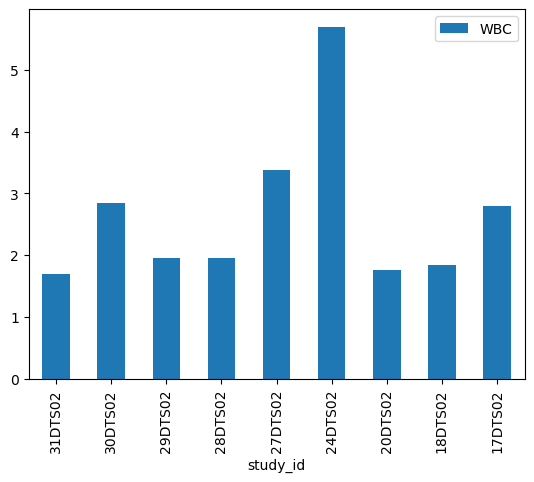

In [12]:
# Bar plot

df[['study_id', 'WBC']].plot(kind='bar', x='study_id')

<Axes: xlabel='study_id'>

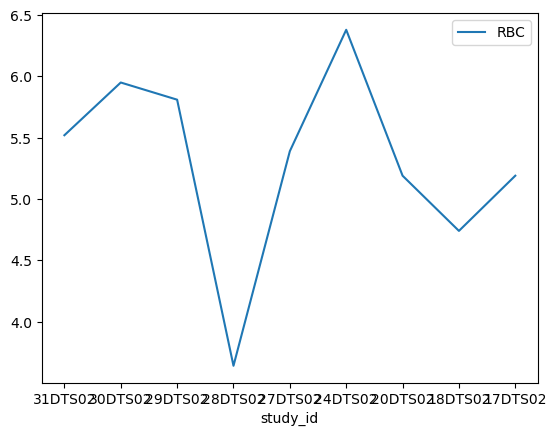

In [13]:
# line plot

df[['study_id', 'RBC']].plot(kind='line', x='study_id')

<Axes: xlabel='study_id', ylabel='HGB'>

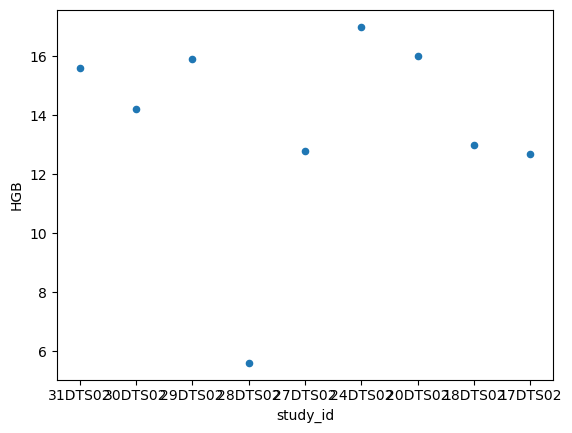

In [14]:
# Scatter plot

df.plot(kind='scatter', x='study_id', y='HGB')